# Agent Recruitment - Capstone Project- Virender Kumar

In [1108]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from datetime import datetime
from datetime import date
import xgboost as xgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# Importing Train and Test Dataset

In [1109]:
# importing Dataset into python

train= pd.read_csv("Capstone/train.csv")
test = pd.read_csv('Capstone/test.csv')
SampleSubmission = pd.read_csv('Capstone/SampleSubmission.csv')
Test_var= test.copy()

In [1110]:
train

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,...,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9522,FIN1009523,160017,7/1/2008,160032.0,M,1/18/1970,M,Salaried,Graduate,5/5/2008,...,Probation,M,5/10/1967,0.0,0.0,0.0,0.0,0.0,0.0,0
9523,FIN1009524,848101,7/1/2008,848302.0,M,9/11/1956,M,NaN,Graduate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9524,FIN1009525,753012,7/1/2008,753014.0,F,8/7/1975,M,Salaried,Graduate,8/22/2006,...,Confirmation,M,7/22/1970,0.0,0.0,316126.0,9.0,305775.0,8.0,0
9525,FIN1009526,575003,7/1/2008,571248.0,M,12/23/1986,S,Salaried,Class XII,6/5/2008,...,Probation,M,9/23/1976,0.0,0.0,0.0,0.0,0.0,0.0,0


In [1111]:
test

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
0,FIN1009528,284001,7/2/2008,284001.0,M,8/5/1982,S,Salaried,Graduate,5/26/2008,...,2.0,Probation,F,10/14/1978,1.0,0.0,0.0,0.0,0.0,0.0
1,FIN1009529,800001,7/2/2008,800026.0,M,3/11/1968,M,Salaried,Graduate,6/24/2008,...,2.0,Probation,M,3/3/1971,2.0,0.0,0.0,0.0,0.0,0.0
2,FIN1009530,800001,7/2/2008,NaN,M,12/16/1984,S,NaN,Graduate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FIN1009531,800001,7/2/2008,844112.0,M,6/7/1971,S,Salaried,Graduate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FIN1009532,533101,7/2/2008,533102.0,M,7/22/1978,S,NaN,Masters of Business Administration,12/4/2007,...,3.0,Confirmation,M,6/23/1977,4.0,1.0,97352.0,3.0,97352.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,FIN1014568,691008,1/1/2009,691601.0,F,5/21/1966,M,Others,Graduate,12/2/2008,...,3.0,Probation,M,5/27/1978,0.0,0.0,0.0,0.0,0.0,0.0
5041,FIN1014569,691008,1/1/2009,691601.0,M,12/2/1949,M,Others,Graduate,12/2/2008,...,3.0,Probation,M,5/27/1978,0.0,0.0,0.0,0.0,0.0,0.0
5042,FIN1014570,691008,1/1/2009,691005.0,M,5/20/1977,M,Business,Class XII,12/2/2008,...,3.0,Probation,M,5/27/1978,0.0,0.0,0.0,0.0,0.0,0.0
5043,FIN1014571,208001,1/1/2009,208022.0,M,7/22/1985,M,NaN,Graduate,9/25/2008,...,3.0,Probation,M,6/26/1978,4.0,1.0,15347.0,1.0,15347.0,1.0


In [1112]:
train.dtypes

ID                              object
Office_PIN                       int64
Application_Receipt_Date        object
Applicant_City_PIN             float64
Applicant_Gender                object
Applicant_BirthDate             object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_DOJ                     object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_DoB                     object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
dtype: object

# Handling outliers

<AxesSubplot:xlabel='Manager_Grade'>

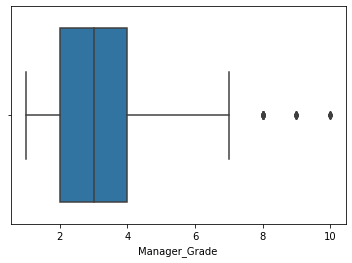

In [1113]:
sns.boxplot(x =train["Manager_Grade"])

In [1114]:
mgtrain_q1 = train['Manager_Grade'].quantile(0.05)
mgtrain_q3 = train['Manager_Grade'].quantile(0.95)

iqr = mgtrain_q3-mgtrain_q1 #Interquartile range
fence_low  = mgtrain_q1-1.5*iqr
fence_high = mgtrain_q3+1.5*iqr
train = train[(train['Manager_Grade'] > fence_low) & (train['Manager_Grade'] < fence_high)]


<AxesSubplot:xlabel='Manager_Num_Application'>

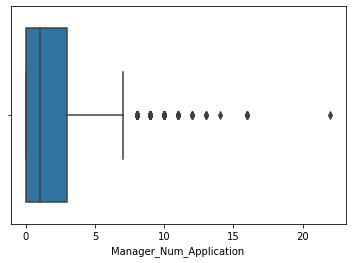

In [1115]:
sns.boxplot(x =train["Manager_Num_Application"])

In [1116]:
train_q1 = train['Manager_Num_Application'].quantile(0.05)
train_q3 = train['Manager_Num_Application'].quantile(0.95)
iqr = train_q3-train_q1 #Interquartile range
fence_low  = train_q1-1.5*iqr
fence_high = train_q3+1.5*iqr
train = train[(train['Manager_Num_Application'] > fence_low) & (train['Manager_Num_Application'] < fence_high)]


<AxesSubplot:xlabel='Manager_Num_Coded'>

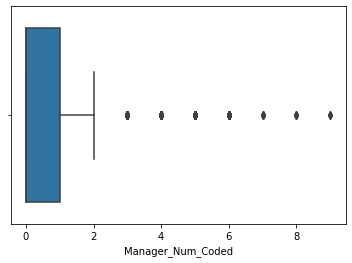

In [1117]:
sns.boxplot(x =train["Manager_Num_Coded"])

In [1118]:
train_q1 = train['Manager_Num_Coded'].quantile(0.05)
train_q3 = train['Manager_Num_Coded'].quantile(0.95)
iqr = train_q3-train_q1 #Interquartile range
fence_low  = train_q1-1.5*iqr
fence_high = train_q3+1.5*iqr
train = train[(train['Manager_Num_Coded'] > fence_low) & (train['Manager_Num_Coded'] < fence_high)]


<AxesSubplot:xlabel='Manager_Business'>

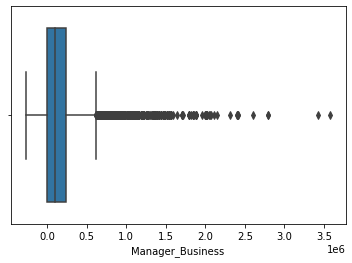

In [1119]:
sns.boxplot(x =train["Manager_Business"])

In [1120]:
train_q1 = train['Manager_Business'].quantile(0.05)
train_q3 = train['Manager_Business'].quantile(0.95)
iqr = train_q3-train_q1 #Interquartile range
fence_low  = train_q1-1.5*iqr
fence_high = train_q3+1.5*iqr
train = train[(train['Manager_Business'] > fence_low) & (train['Manager_Business'] < fence_high)]


<AxesSubplot:xlabel='Manager_Num_Products'>

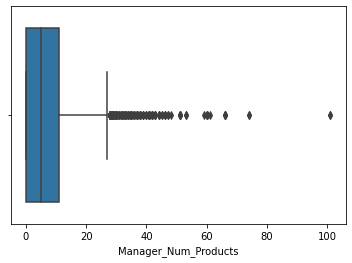

In [1121]:
sns.boxplot(x =train["Manager_Num_Products"])

In [1122]:
train_q1 = train['Manager_Num_Products'].quantile(0.05)
train_q3 = train['Manager_Num_Products'].quantile(0.95)
iqr = train_q3-train_q1 #Interquartile range
fence_low  = train_q1-1.5*iqr
fence_high = train_q3+1.5*iqr
train = train[(train['Manager_Num_Products'] > fence_low) & (train['Manager_Num_Products'] < fence_high)]


In [1123]:
train_q1 = train['Manager_Business2'].quantile(0.05)
train_q3 = train['Manager_Business2'].quantile(0.95)
iqr = train_q3-train_q1 #Interquartile range
fence_low  = train_q1-1.5*iqr
fence_high = train_q3+1.5*iqr
train = train[(train['Manager_Business2'] > fence_low) & (train['Manager_Business2'] < fence_high)]


In [1124]:
train_q1 = train['Manager_Num_Products2'].quantile(0.05)
train_q3 = train['Manager_Num_Products2'].quantile(0.95)
iqr = train_q3-train_q1 #Interquartile range
fence_low  = train_q1-1.5*iqr
fence_high = train_q3+1.5*iqr
train = train[(train['Manager_Num_Products2'] > fence_low) & (train['Manager_Num_Products2'] < fence_high)]


## Feature Engineering like filling missing values, scaling, binning, encoding...


In [1125]:

train['ID'] = train['ID'].str.replace("FIN", "0")
train['ID'] = train['ID'].astype(int)

test['ID'] = test['ID'].str.replace("FIN", "0")
test['ID'] = test['ID'].astype(int)

train['ID'] = train['ID']  - 1000000
test['ID'] = test['ID']  - 1000000


In [1126]:

train['Manager_Joining_Designation'] = train['Manager_Joining_Designation'].str.replace("Level ", "0")

test['Manager_Joining_Designation'] = test['Manager_Joining_Designation'].str.replace("Level ", "0")

train['Manager_Current_Designation'] = train['Manager_Current_Designation'].str.replace("Level ", "0")

test['Manager_Current_Designation'] = test['Manager_Current_Designation'].str.replace("Level ", "0")


In [1127]:
train

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,1,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,2,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,3,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,4,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,5,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,...,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9519,9520,250001,7/1/2008,250004.0,F,12/3/1965,M,NaN,Graduate,6/28/2006,...,Confirmation,M,6/3/1974,1.0,1.0,55000.0,2.0,55000.0,2.0,0
9521,9522,814112,7/1/2008,816118.0,M,11/20/1969,M,NaN,Class XII,10/3/2006,...,Confirmation,M,9/26/1955,4.0,2.0,418339.0,13.0,418339.0,13.0,0
9522,9523,160017,7/1/2008,160032.0,M,1/18/1970,M,Salaried,Graduate,5/5/2008,...,Probation,M,5/10/1967,0.0,0.0,0.0,0.0,0.0,0.0,0
9524,9525,753012,7/1/2008,753014.0,F,8/7/1975,M,Salaried,Graduate,8/22/2006,...,Confirmation,M,7/22/1970,0.0,0.0,316126.0,9.0,305775.0,8.0,0


In [1128]:
## Replacing columns of Applicant_Qualification which are having count 1 to others

train['Applicant_Qualification'] =train['Applicant_Qualification'].replace({'Associate / Fellow of Institute of Chartered Accountans of India':'Others',
                                                                              'Associate/Fellow of Institute of Company Secretories of India':'Others',
                                                                              'Associate/Fellow of Insurance Institute of India':'Others',
                                                                              'Professional Qualification in Marketing':'Others',
                                                                              'Certified Associateship of Indian Institute of Bankers':'Others',
                                                                              'Associate/Fellow of Acturial Society of India':'Others'})

## Replacing columns of Applicant_Qualification which are having count 1 to others

test['Applicant_Qualification'] =test['Applicant_Qualification'].replace({'Associate / Fellow of Institute of Chartered Accountans of India':'Others',
                                                                              'Associate/Fellow of Institute of Company Secretories of India':'Others',
                                                                              'Associate/Fellow of Insurance Institute of India':'Others',
                                                                              'Professional Qualification in Marketing':'Others',
                                                                              'Certified Associateship of Indian Institute of Bankers':'Others',
                                                                              'Associate/Fellow of Acturial Society of India':'Others'})


train['Manager_Joining_Designation'] =train['Manager_Joining_Designation'].replace({'Other':'1'})

test['Manager_Joining_Designation'] =test['Manager_Joining_Designation'].replace({'Other':'1'})

In [1129]:
# Drived new columns for train and test

train['Application_Receipt_Date']=pd.to_datetime(train['Application_Receipt_Date'])
train['Applicant_BirthDate']=pd.to_datetime(train['Applicant_BirthDate'])
train['Manager_DoB']=pd.to_datetime(train['Manager_DoB'])
train['Manager_DOJ']=pd.to_datetime(train['Manager_DOJ'])

test['Application_Receipt_Date']=pd.to_datetime(test['Application_Receipt_Date'])
test['Applicant_BirthDate']=pd.to_datetime(test['Applicant_BirthDate'])
test['Manager_DoB']=pd.to_datetime(test['Manager_DoB'])
test['Manager_DOJ']=pd.to_datetime(test['Manager_DOJ'])


In [1130]:
# Fill null values for categorial and numerical values

train['Applicant_Gender'] = train['Applicant_Gender'].fillna(train['Applicant_Gender'].mode()[0])
train['Applicant_Marital_Status'] = train['Applicant_Marital_Status'].fillna(train['Applicant_Marital_Status'].mode()[0])
train['Applicant_Occupation'] = train['Applicant_Occupation'].fillna(train['Applicant_Occupation'].mode()[0])
train['Applicant_Qualification'] = train['Applicant_Qualification'].fillna(train['Applicant_Qualification'].mode()[0])
train['Manager_Status'] = train['Manager_Status'].fillna(train['Manager_Status'].mode()[0])
train['Manager_Gender'] = train['Manager_Gender'].fillna(train['Manager_Gender'].mode()[0])
train['Manager_Grade'] = train['Manager_Grade'].fillna(train['Manager_Grade'].mode()[0])
train['Manager_Current_Designation'] = train['Manager_Current_Designation'].fillna(train['Manager_Current_Designation'].mode()[0])
train['Manager_Joining_Designation'] = train['Manager_Joining_Designation'].fillna(train['Manager_Joining_Designation'].mode()[0])


test['Applicant_Gender'] = test['Applicant_Gender'].fillna(test['Applicant_Gender'].mode()[0])
test['Applicant_Marital_Status'] = test['Applicant_Marital_Status'].fillna(test['Applicant_Marital_Status'].mode()[0])
test['Applicant_Occupation'] = test['Applicant_Occupation'].fillna(test['Applicant_Occupation'].mode()[0])
test['Applicant_Qualification'] = test['Applicant_Qualification'].fillna(test['Applicant_Qualification'].mode()[0])
test['Manager_Status'] = test['Manager_Status'].fillna(test['Manager_Status'].mode()[0])
test['Manager_Gender'] = test['Manager_Gender'].fillna(test['Manager_Gender'].mode()[0])
test['Manager_Grade'] = test['Manager_Grade'].fillna(test['Manager_Grade'].mode()[0])
test['Manager_Current_Designation'] = test['Manager_Current_Designation'].fillna(test['Manager_Current_Designation'].mode()[0])
test['Manager_Joining_Designation'] = test['Manager_Joining_Designation'].fillna(test['Manager_Joining_Designation'].mode()[0])


In [1131]:
# Performed one hot endcoding

train['Applicant_Gender'] = pd.get_dummies(train['Applicant_Gender'])
train['Applicant_Marital_Status'] = pd.get_dummies(train['Applicant_Marital_Status'])
train['Applicant_Occupation'] = pd.get_dummies(train['Applicant_Occupation'])
train['Applicant_Qualification'] = pd.get_dummies(train['Applicant_Qualification'])
train['Manager_Status'] = pd.get_dummies(train['Manager_Status'])
train['Applicant_Gender'] = pd.get_dummies(train['Applicant_Gender'])
train['Manager_Gender'] = pd.get_dummies(train['Manager_Gender'])

test['Applicant_Gender'] = pd.get_dummies(test['Applicant_Gender'])
test['Applicant_Marital_Status'] = pd.get_dummies(test['Applicant_Marital_Status'])
test['Applicant_Occupation'] = pd.get_dummies(test['Applicant_Occupation'])
test['Applicant_Qualification'] = pd.get_dummies(test['Applicant_Qualification'])
test['Manager_Status'] = pd.get_dummies(test['Manager_Status'])
test['Applicant_Gender'] = pd.get_dummies(test['Applicant_Gender'])
test['Manager_Gender'] = pd.get_dummies(test['Manager_Gender'])



In [1132]:
numerical_columns = ['ID','Office_PIN', 'Applicant_City_PIN', 'Applicant_Gender', 'Applicant_Marital_Status', 'Applicant_Occupation',
           'Applicant_Qualification', 'Manager_Status', 'Manager_Gender', 'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business', 
            'Manager_Num_Products','Manager_Business', 'Manager_Num_Products','Manager_Business2', 'Manager_Num_Products2','Manager_Grade','Manager_Current_Designation','Manager_Joining_Designation']

In [1133]:
# Fill NULL values fpor Date column

train['Application_Receipt_Date']=train['Application_Receipt_Date'].replace({'':np.nan}).ffill()
train['Applicant_BirthDate']=train['Applicant_BirthDate'].replace({'':np.nan}).ffill()
train['Manager_DOJ']=train['Manager_DOJ'].replace({'':np.nan}).ffill()
train['Manager_DoB']=train['Manager_DoB'].replace({'':np.nan}).ffill()

test['Application_Receipt_Date']=test['Application_Receipt_Date'].replace({'':np.nan}).ffill()
test['Applicant_BirthDate']=test['Applicant_BirthDate'].replace({'':np.nan}).ffill()
test['Manager_DOJ']=test['Manager_DOJ'].replace({'':np.nan}).ffill()
test['Manager_DoB']=test['Manager_DoB'].replace({'':np.nan}).ffill()


ref: https://stackoverflow.com/questions/47024931/how-to-fill-missing-dates-in-pandas-dataframe

In [1134]:

train["Applicant_Age"] = np.round(((train['Application_Receipt_Date']-train['Applicant_BirthDate'])/ np.timedelta64(1, 'D'))/365)
train["Manager_Age"] = np.round(((train['Application_Receipt_Date']-train['Manager_DoB'])/ np.timedelta64(1, 'D'))/365)
train["Manager_Experience"] = np.round(((train['Application_Receipt_Date']-train['Manager_DOJ'])/ np.timedelta64(1, 'D'))/365,2)


test["Applicant_Age"] = np.round(((test['Application_Receipt_Date']-test['Applicant_BirthDate'])/ np.timedelta64(1, 'D'))/365)
test["Manager_Age"] = np.round(((test['Application_Receipt_Date']-test['Manager_DoB'])/ np.timedelta64(1, 'D'))/365)
test["Manager_Experience"] = np.round(((test['Application_Receipt_Date']-test['Manager_DOJ'])/ np.timedelta64(1, 'D'))/365,2)


### Adding Timing Trend Factor

In [1135]:
grp = train.groupby('Application_Receipt_Date')
grp['ID'].count()
train['Trend'] = (grp['ID'].cumcount()-1)
tmax=train['Trend'].max()
tmin=train['Trend'].min()
train['Trend']=np.round((train.Trend - tmin) / (tmax - tmin),3)

In [1136]:
grp = test.groupby('Application_Receipt_Date')
grp['ID'].count()
test['Trend'] = (grp['ID'].cumcount()-1)
tmax=test['Trend'].max()
tmin=test['Trend'].min()
test['Trend']=np.round((test.Trend - tmin) / (tmax - tmin),3)

In [1137]:
train['Manager_Business2']=train['Manager_Business']-train['Manager_Business2']
train['Manager_Num_Products2']=train['Manager_Num_Products']-train['Manager_Num_Products2']

test['Manager_Business2']=test['Manager_Business']-test['Manager_Business2']
test['Manager_Num_Products2']=test['Manager_Num_Products']-test['Manager_Num_Products2']

In [1138]:
train['Manager_Business2'].value_counts

<bound method IndexOpsMixin.value_counts of 0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
         ...   
9519        0.0
9521        0.0
9522        0.0
9524    10351.0
9525        0.0
Name: Manager_Business2, Length: 8774, dtype: float64>

In [1139]:
for col in numerical_columns:
    train[col] = (train[col].fillna(train[col].mean()))
    test[col] = (test[col].fillna(test[col].mean()))

In [1140]:
#Scaling and transformation for numerical columns

stdscaler = StandardScaler()
for col in numerical_columns:
    train[col] = stdscaler.fit_transform(train[col].values.reshape(-1, 1))
    test[col] = stdscaler.transform(test[col].values.reshape(-1, 1))

In [1141]:
train

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,Applicant_Age,Manager_Age,Manager_Experience,Trend
0,-1.756842,1.676864,2007-04-16,1.647439,0.564802,1971-12-19,-0.021357,-0.569190,-0.150369,2005-11-10,...,0.217689,0.672454,2.661842,-0.050000,-0.053183,0,35.0,29.0,1.43,0.000
1,-1.756472,1.676864,2007-04-16,1.647401,0.564802,1983-02-17,-0.021357,-0.569190,-0.150369,2005-11-10,...,0.217689,0.672454,2.661842,-0.050000,-0.053183,1,24.0,29.0,1.43,0.007
2,-1.756103,1.497172,2007-04-16,1.647359,0.564802,1966-01-16,-0.021357,1.756881,-0.150369,2006-05-27,...,-0.644616,0.764174,2.155892,-0.050000,-0.053183,0,41.0,38.0,0.89,0.014
3,-1.755734,1.557544,2007-04-16,1.520596,0.564802,1988-02-03,-0.021357,-0.569190,-0.150369,2003-08-21,...,-0.644616,0.601817,1.902918,-0.050000,-0.053183,0,19.0,29.0,3.65,0.020
4,-1.755364,1.557544,2007-04-16,1.525833,0.564802,1985-07-04,-0.021357,-0.569190,-0.150369,2006-05-08,...,0.217689,0.234043,1.270481,-0.050000,-0.053183,0,22.0,36.0,0.94,0.027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9519,1.758978,-0.855938,2008-07-01,-0.863882,-1.770531,1965-12-03,-0.021357,-0.569190,-0.150369,2006-06-28,...,0.217689,-0.499390,-0.626829,-0.050000,-0.053183,0,43.0,34.0,2.01,0.054
9521,1.759717,1.557544,2008-07-01,1.529075,0.564802,1969-11-20,-0.021357,-0.569190,-0.150369,2006-10-03,...,1.079995,1.019890,0.764532,-0.050000,-0.053183,0,39.0,53.0,1.75,0.061
9522,1.760086,-1.240924,2008-07-01,-1.244193,0.564802,1970-01-18,-0.021357,-0.569190,-0.150369,2008-05-05,...,-0.644616,-0.729369,-0.879803,-0.050000,-0.053183,0,38.0,41.0,0.16,0.068
9524,1.760825,1.296135,2008-07-01,1.262335,-1.770531,1975-08-07,-0.021357,-0.569190,-0.150369,2006-08-22,...,-0.644616,0.592492,0.258583,0.305422,2.455574,0,33.0,38.0,1.86,0.074


In [1142]:
train.dtypes

ID                                    float64
Office_PIN                            float64
Application_Receipt_Date       datetime64[ns]
Applicant_City_PIN                    float64
Applicant_Gender                      float64
Applicant_BirthDate            datetime64[ns]
Applicant_Marital_Status              float64
Applicant_Occupation                  float64
Applicant_Qualification               float64
Manager_DOJ                    datetime64[ns]
Manager_Joining_Designation           float64
Manager_Current_Designation           float64
Manager_Grade                         float64
Manager_Status                        float64
Manager_Gender                        float64
Manager_DoB                    datetime64[ns]
Manager_Num_Application               float64
Manager_Num_Coded                     float64
Manager_Business                      float64
Manager_Num_Products                  float64
Manager_Business2                     float64
Manager_Num_Products2             

In [1143]:
test1=test

In [1144]:
# train.drop(['Application_Receipt_Date','Manager_DoB','Applicant_BirthDate','Manager_DOJ','Applicant_City_PIN','Manager_Current_Designation','Manager_Num_Products','Manager_Num_Products2','Manager_Status','Manager_Num_Coded','Applicant_Gender','Applicant_Occupation','Applicant_Qualification'], axis=1,inplace=True)

# test.drop(['Application_Receipt_Date','Manager_DoB','Applicant_BirthDate','Manager_DOJ','Applicant_City_PIN','Manager_Current_Designation','Manager_Num_Products','Manager_Num_Products2','Manager_Status','Manager_Num_Coded','Applicant_Gender','Applicant_Occupation','Applicant_Qualification'], axis=1,inplace=True)

train.drop(['Application_Receipt_Date','Manager_DoB','Applicant_BirthDate','Manager_DOJ'], axis=1,inplace=True)

test.drop(['Application_Receipt_Date','Manager_DoB','Applicant_BirthDate','Manager_DOJ'], axis=1,inplace=True)

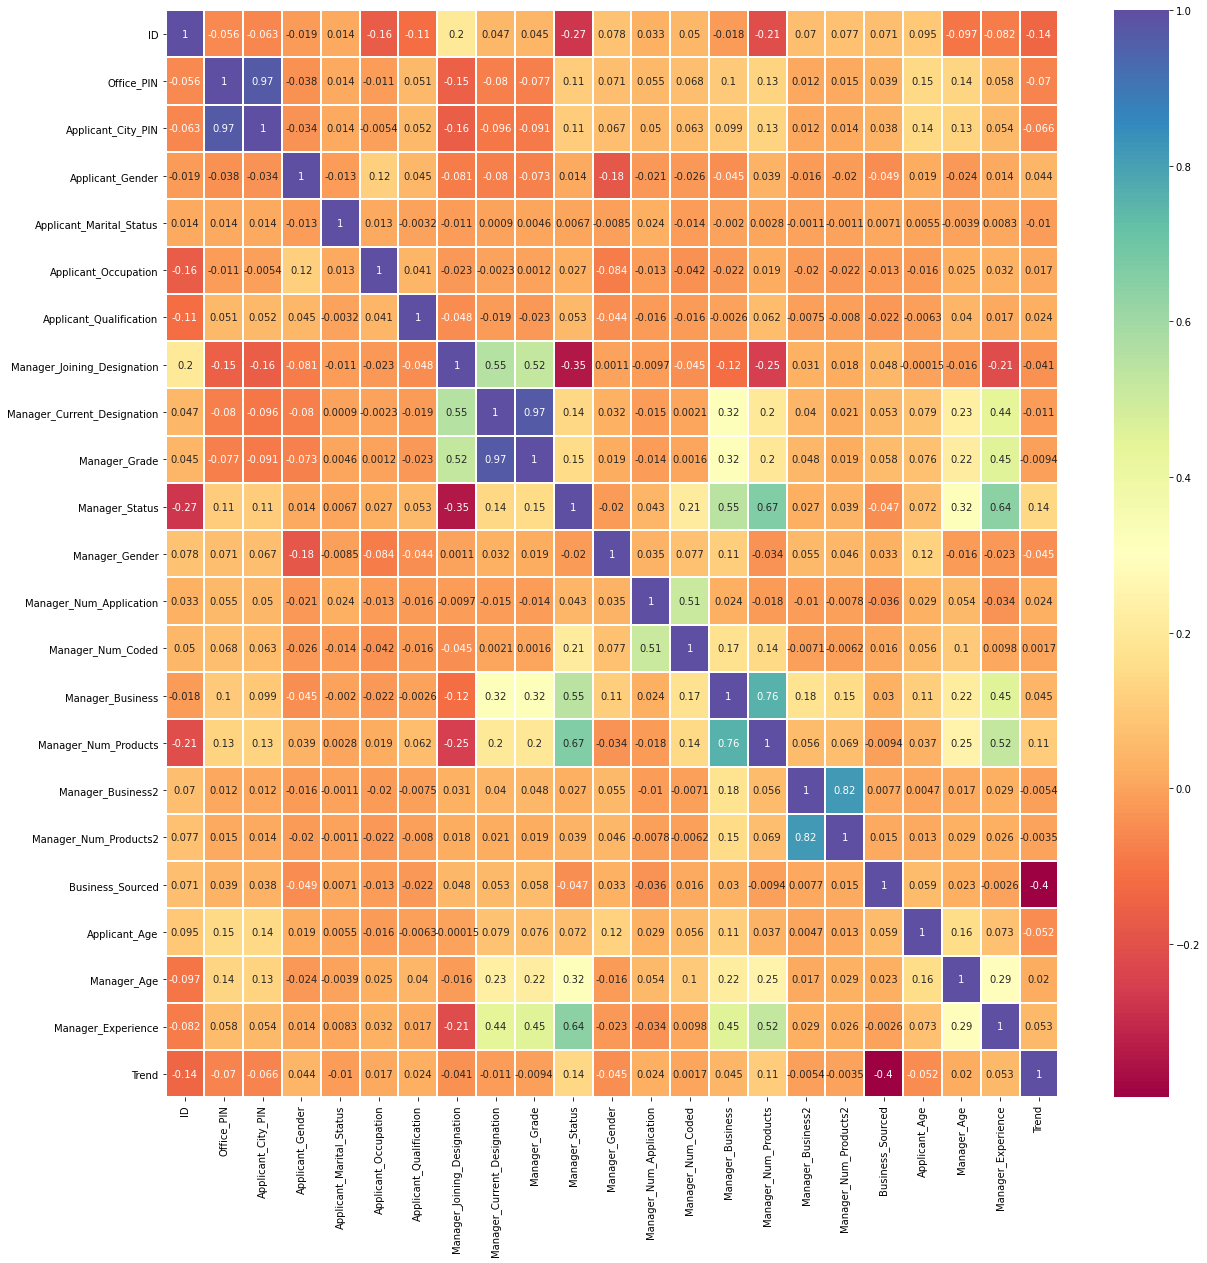

In [1145]:
# Creating a heatmap of correlation matrix
plt.figure(figsize=[20,20])
sns.heatmap(train.corr(),  cmap="Spectral",linewidth =1, annot = True)
plt.show()

# Model Building

In [1146]:
# importing the train test split function
# Target variable
train['Business_Sourced'] = train['Business_Sourced'].astype('category')
x = train.drop(['Business_Sourced'], axis=1)
y = train['Business_Sourced']

from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(x, y, random_state = 235, stratify = y, test_size = 0.25)

In [1147]:
train_y.shape, valid_y.shape

((6580,), (2194,))

In [1148]:
train_y.value_counts(normalize = True), valid_y.value_counts(normalize = True)

(0    0.656991
 1    0.343009
 Name: Business_Sourced, dtype: float64,
 0    0.657247
 1    0.342753
 Name: Business_Sourced, dtype: float64)

In [1149]:
# import scalers

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

train_x = scaler.fit_transform(train_x)
valid_x = scaler.transform(valid_x)

In [1150]:
train

,ID,Office_PIN,Applicant_City_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,...,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,Applicant_Age,Manager_Age,Manager_Experience,Trend
0,-1.756842,1.676864,1.647439,0.564802,-0.021357,-0.569190,-0.150369,-0.799342,-0.206234,-0.227355,...,0.217689,0.672454,2.661842,-0.050000,-0.053183,0,35.0,29.0,1.43,0.000
1,-1.756472,1.676864,1.647401,0.564802,-0.021357,-0.569190,-0.150369,-0.799342,-0.206234,-0.227355,...,0.217689,0.672454,2.661842,-0.050000,-0.053183,1,24.0,29.0,1.43,0.007
2,-1.756103,1.497172,1.647359,0.564802,-0.021357,1.756881,-0.150369,-0.799342,-1.199373,-1.110015,...,-0.644616,0.764174,2.155892,-0.050000,-0.053183,0,41.0,38.0,0.89,0.014
3,-1.755734,1.557544,1.520596,0.564802,-0.021357,-0.569190,-0.150369,-0.799342,0.786905,0.655305,...,-0.644616,0.601817,1.902918,-0.050000,-0.053183,0,19.0,29.0,3.65,0.020
4,-1.755364,1.557544,1.525833,0.564802,-0.021357,-0.569190,-0.150369,-0.799342,-1.199373,-1.110015,...,0.217689,0.234043,1.270481,-0.050000,-0.053183,0,22.0,36.0,0.94,0.027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9519,1.758978,-0.855938,-0.863882,-1.770531,-0.021357,-0.569190,-0.150369,-0.799342,-0.206234,-0.227355,...,0.217689,-0.499390,-0.626829,-0.050000,-0.053183,0,43.0,34.0,2.01,0.054
9521,1.759717,1.557544,1.529075,0.564802,-0.021357,-0.569190,-0.150369,-0.799342,-1.199373,-1.110015,...,1.079995,1.019890,0.764532,-0.050000,-0.053183,0,39.0,53.0,1.75,0.061
9522,1.760086,-1.240924,-1.244193,0.564802,-0.021357,-0.569190,-0.150369,0.421446,-0.206234,-0.227355,...,-0.644616,-0.729369,-0.879803,-0.050000,-0.053183,0,38.0,41.0,0.16,0.068
9524,1.760825,1.296135,1.262335,-1.770531,-0.021357,-0.569190,-0.150369,0.421446,-0.206234,-0.227355,...,-0.644616,0.592492,0.258583,0.305422,2.455574,0,33.0,38.0,1.86,0.074


## Regression Model

In [1151]:
# ## Logistic regression model

# from sklearn.linear_model import LogisticRegression as LR

# clf = LR(max_iter = 1000) # , class_weight = 'balanced'
# clf.fit(train_x, train_y)

# # make training prediction
# train_yhat = clf.predict_proba(train_x)[:,1]
# train_score = roc_auc_score(train_y, train_yhat)

# # make validation prediction
# valid_yhat = clf.predict_proba(valid_x)[:,1]
# valid_score = roc_auc_score(valid_y, valid_yhat)

# train_score, valid_score

In [1152]:
# clf = LR(max_iter = 1000)
# clf.fit(train_x, train_y)

# # make training prediction
# valid_yhat = clf.predict_proba(train_x)[:,1]
# cf = confusion_matrix(valid_y, valid_yhat)
# disp = ConfusionMatrixDisplay(cf)

# disp.plot()

## Decision Tree Model

In [1153]:
# ## Decision tree implementation

# from sklearn.tree import DecisionTreeClassifier as DT

# # dt_model = DT(criterion = 'entropy' ,max_depth=4, max_leaf_nodes=62, random_state=123)
# dt_model = DT(max_depth=2)
# dt_model.fit(train_x, train_y)


# # make training prediction
# train_yhat = dt_model.predict_proba(train_x)[:,1]
# train_score = roc_auc_score(train_y, train_yhat)

# # make validation prediction
# valid_yhat = dt_model.predict_proba(valid_x)[:,1]
# valid_score = roc_auc_score(valid_y, valid_yhat)

# train_score, valid_score

# #(0.824428071548108, 0.8104614012928153)

In [1154]:
# xgbtrain = xgb.DMatrix(train_x, label=train_y)
# xgbtest = xgb.DMatrix(valid_x, label=valid_y)
# dpred = xgb.DMatrix(test)

In [1155]:
# estimator = XGBClassifier(
#     objective= 'binary:logistic',
#     nthread=4,
#     seed=42
# )

In [1156]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV
# params = {
#     'max_depth': range (2, 10, 1),
#     'n_estimators': range(60, 220, 40),
#     'learning_rate': [0.1, 0.01, 0.05]
# }

In [1157]:
# grid_search = GridSearchCV(
#     estimator=estimator,
#     param_grid=params,
#     scoring = 'roc_auc',
#     n_jobs = 10,
#     cv = 10,
#     verbose=True
# )

# grid_search.fit(train_x, train_y)
# grid_search.best_estimator_

In [1158]:
# import xgboost as xgb
# from sklearn.metrics import roc_auc_score

#  #from sklearn.metrics import f1_score

# model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
#               importance_type='gain',
#               learning_rate=0.1, max_delta_step=0, max_depth=1,
#               min_child_weight=1,n_estimators=180, n_jobs=4, nthread=4, num_parallel_tree=1,
#                       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
#                 seed=42, subsample=1, tree_method='exact', validate_parameters=1, verbosity=None)


# model.fit(train_x, train_y)
# # make training prediction
# train_yhat = np.round(model.predict_proba(train_x)[:,1],2)
# train_score = np.round(roc_auc_score(train_y, train_yhat),2)

# # make test prediction
# test_yhat = np.round(model.predict_proba(valid_x)[:,1],2)
# test_score = np.round(roc_auc_score(valid_y, test_yhat),2)


# train_score, test_score

In [1159]:
# #tune 2

# import xgboost as xgb
# from sklearn.metrics import roc_auc_score

#  #from sklearn.metrics import f1_score

# model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
#               gpu_id=-1, importance_type='gain', interaction_constraints='',
#               learning_rate=0.300000012, max_delta_step=0, max_depth=1,
#               max_leaf_nodes=2, min_child_weight=1,
#               monotone_constraints='()', n_estimators=100, n_jobs=8,
#               num_parallel_tree=1, random_state=123, reg_alpha=0, reg_lambda=1,
#               scale_pos_weight=1, subsample=1, tree_method='exact',
#               validate_parameters=1, verbosity=None)


# model.fit(train_x, train_y)
# # make training prediction
# train_yhat = np.round(model.predict_proba(train_x)[:,1],2)
# train_score = np.round(roc_auc_score(train_y, train_yhat),2)

# # make test prediction
# test_yhat = np.round(model.predict_proba(valid_x)[:,1],2)
# test_score = np.round(roc_auc_score(valid_y, test_yhat),2)


# train_score, test_score


## Final Model

In [1160]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

model=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=1.5, learning_rate=0.02,
       max_delta_step=0, max_depth=1, min_child_weight=1,
       n_estimators=600, n_jobs=9, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)

model.fit(train_x, train_y)
# make training prediction
train_yhat = np.round(model.predict_proba(train_x)[:,1],2)
train_score = np.round(roc_auc_score(train_y, train_yhat),2)

# make test prediction
test_yhat = np.round(model.predict_proba(valid_x)[:,1],2)
test_score = np.round(roc_auc_score(valid_y, test_yhat),2)
train_score, test_score


[22:07:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:07:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(0.82, 0.8)

In [1161]:
# import xgboost as xgb
# from sklearn.metrics import roc_auc_score
# from sklearn.ensemble import ExtraTreesClassifier

# model=ExtraTreesClassifier(max_depth=7,min_samples_split=2, random_state=0)

# model.fit(train_x, train_y)
# # make training prediction
# train_yhat = np.round(model.predict_proba(train_x)[:,1],2)
# train_score = np.round(roc_auc_score(train_y, train_yhat),2)

# # make test prediction
# test_yhat = np.round(model.predict_proba(valid_x)[:,1],2)
# test_score = np.round(roc_auc_score(valid_y, test_yhat),2)
# train_score, test_score


In [1162]:
# # # Tune the depth of tree

# train_score = []
# valid_score = []

# for depth in range(1, 30):
# #     dt_model =   xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
# #               colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
# #               gpu_id=-1, importance_type='gain', interaction_constraints='',
# #               learning_rate=0.300000012, max_delta_step=0, max_depth=depth,
# #               max_leaf_nodes=2, min_child_weight=1,
# #               monotone_constraints='()', n_estimators=100, n_jobs=8,
# #               num_parallel_tree=1, random_state=123, reg_alpha=0, reg_lambda=1,
# #               scale_pos_weight=1, subsample=1, tree_method='exact',
# #               validate_parameters=1, verbosity=None)
# #     dt_model.fit(train_x, train_y)
# #     dt_model =  xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
# #        colsample_bytree=0.8, gamma=1.5, learning_rate=0.02,
# #        max_delta_step=0, max_depth=depth, min_child_weight=1,
# #        n_estimators=600, n_jobs=4, objective='binary:logistic',
# #        random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
# #        seed=None, silent=True, subsample=0.6)

#     dt_model =  ExtraTreesClassifier(max_depth=depth)
#     dt_model.fit(train_x, train_y)
    
    
    
#     train_yhat = dt_model.predict_proba(train_x)[:,1]
#     train_score_tmp = roc_auc_score(train_y, train_yhat)
#     train_score.append(train_score_tmp)
    
#     valid_yhat = dt_model.predict_proba(valid_x)[:,1]
#     valid_score_tmp = roc_auc_score(valid_y, valid_yhat)
#     valid_score.append(valid_score_tmp)

In [1163]:
# import operator
# df = pd.DataFrame({'max_depth': range(1, 30), 'train_score': train_score, 'valid_score': valid_score, 'Diff': map(operator.sub, train_score, valid_score)})
# df

In [1164]:
# plt.figure()
# plt.plot(df['max_depth'], df['train_score'], marker = 'o')
# plt.plot(df['max_depth'], df['valid_score'], marker = 'x')


In [1165]:
test1.shape
columns=list(test.columns)
test1[columns] = scaler.fit_transform(test[columns])

In [1166]:
# y_pred_test=dt_model.predict_proba(test)[:,1]
y_pred_test=model.predict_proba(test)[:,1]

In [1167]:
y_train_pred_final = pd.DataFrame({ 'Converted_Prob':y_pred_test})
final= np.round(pd.DataFrame({'ID': Test_var.ID.values, 'Business_Sourced':y_train_pred_final['Converted_Prob'] }),3)
final.to_csv('Capstone/SampleSubmission.csv', index = False)

In [1168]:
train

,ID,Office_PIN,Applicant_City_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,...,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,Applicant_Age,Manager_Age,Manager_Experience,Trend
0,-1.756842,1.676864,1.647439,0.564802,-0.021357,-0.569190,-0.150369,-0.799342,-0.206234,-0.227355,...,0.217689,0.672454,2.661842,-0.050000,-0.053183,0,35.0,29.0,1.43,0.000
1,-1.756472,1.676864,1.647401,0.564802,-0.021357,-0.569190,-0.150369,-0.799342,-0.206234,-0.227355,...,0.217689,0.672454,2.661842,-0.050000,-0.053183,1,24.0,29.0,1.43,0.007
2,-1.756103,1.497172,1.647359,0.564802,-0.021357,1.756881,-0.150369,-0.799342,-1.199373,-1.110015,...,-0.644616,0.764174,2.155892,-0.050000,-0.053183,0,41.0,38.0,0.89,0.014
3,-1.755734,1.557544,1.520596,0.564802,-0.021357,-0.569190,-0.150369,-0.799342,0.786905,0.655305,...,-0.644616,0.601817,1.902918,-0.050000,-0.053183,0,19.0,29.0,3.65,0.020
4,-1.755364,1.557544,1.525833,0.564802,-0.021357,-0.569190,-0.150369,-0.799342,-1.199373,-1.110015,...,0.217689,0.234043,1.270481,-0.050000,-0.053183,0,22.0,36.0,0.94,0.027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9519,1.758978,-0.855938,-0.863882,-1.770531,-0.021357,-0.569190,-0.150369,-0.799342,-0.206234,-0.227355,...,0.217689,-0.499390,-0.626829,-0.050000,-0.053183,0,43.0,34.0,2.01,0.054
9521,1.759717,1.557544,1.529075,0.564802,-0.021357,-0.569190,-0.150369,-0.799342,-1.199373,-1.110015,...,1.079995,1.019890,0.764532,-0.050000,-0.053183,0,39.0,53.0,1.75,0.061
9522,1.760086,-1.240924,-1.244193,0.564802,-0.021357,-0.569190,-0.150369,0.421446,-0.206234,-0.227355,...,-0.644616,-0.729369,-0.879803,-0.050000,-0.053183,0,38.0,41.0,0.16,0.068
9524,1.760825,1.296135,1.262335,-1.770531,-0.021357,-0.569190,-0.150369,0.421446,-0.206234,-0.227355,...,-0.644616,0.592492,0.258583,0.305422,2.455574,0,33.0,38.0,1.86,0.074


In [1169]:
# # Creating a heatmap of correlation matrix
# plt.figure(figsize=[20,20])
# sns.heatmap(train.corr(),  cmap="Spectral",linewidth =1, annot = True)
# plt.show()

In [1170]:
# ## GridSearchCV Model Tuning

# from sklearn.model_selection import GridSearchCV

# params = {
#     'max_depth': list(range(5, 15)),
#     'criterion': ['gini', 'entropy'],
#     'max_leaf_nodes': list(range(2, 100, 5))
# }

# grid_search = GridSearchCV(xgb.XGBClassifier(random_state = 123), param_grid = params,
#                           cv = 5, verbose = 1)
# grid_search.fit(train_x, train_y)
# grid_search.best_estimator_



# # XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
# #               colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
# #               gpu_id=-1, importance_type='gain', interaction_constraints='',
# #               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
# #               max_leaf_nodes=2, min_child_weight=1, missing=nan,
# #               monotone_constraints='()', n_estimators=100, n_jobs=8,
# #               num_parallel_tree=1, random_state=123, reg_alpha=0, reg_lambda=1,
# #               scale_pos_weight=1, subsample=1, tree_method='exact',
# #               validate_parameters=1, verbosity=None)